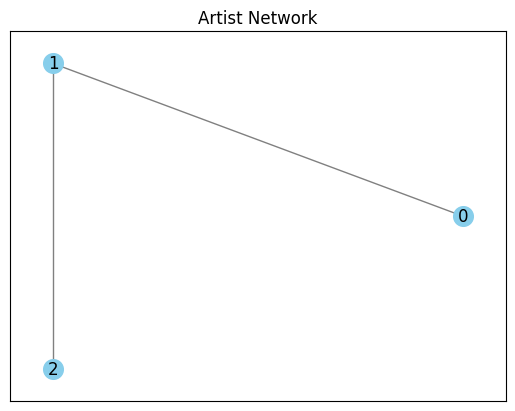

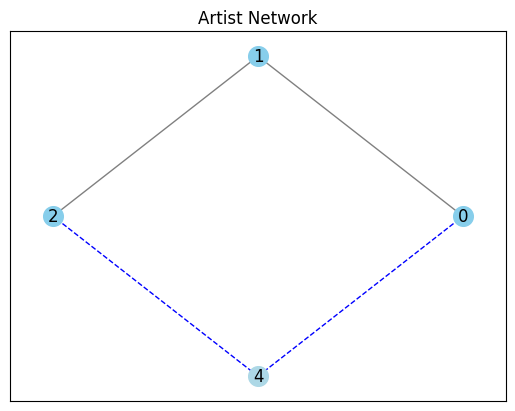

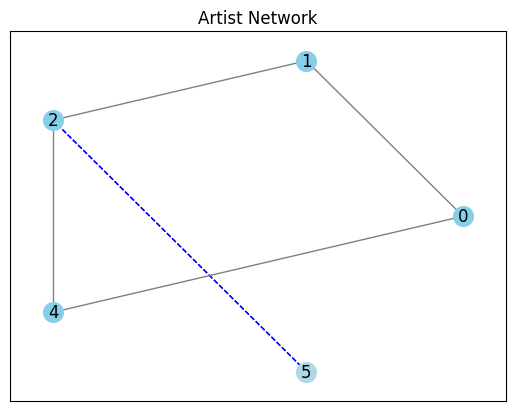

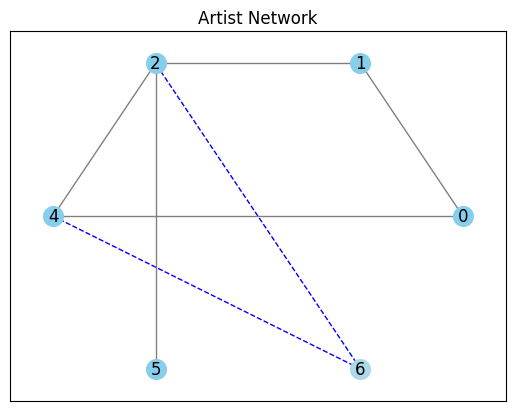

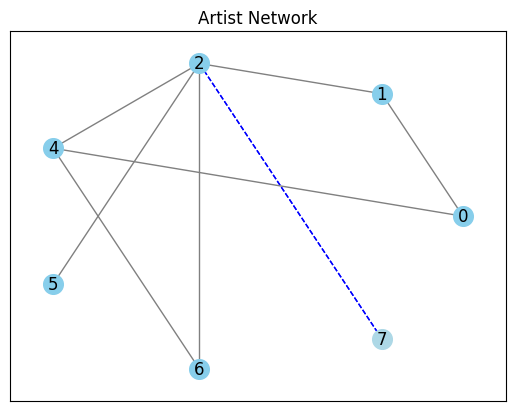

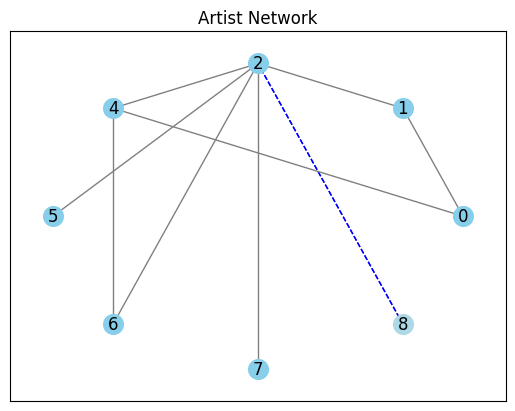

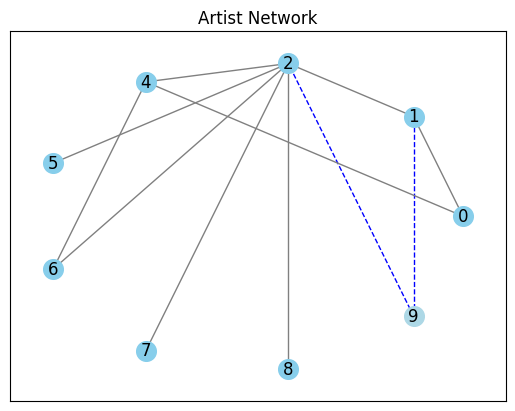

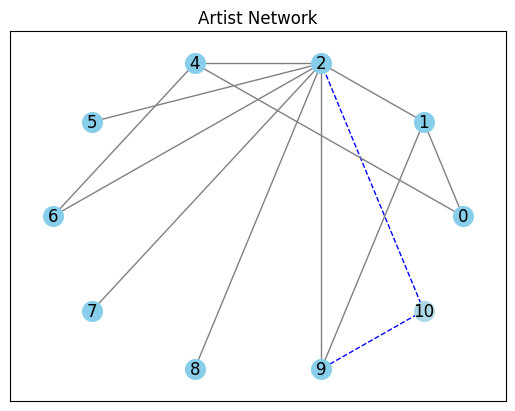

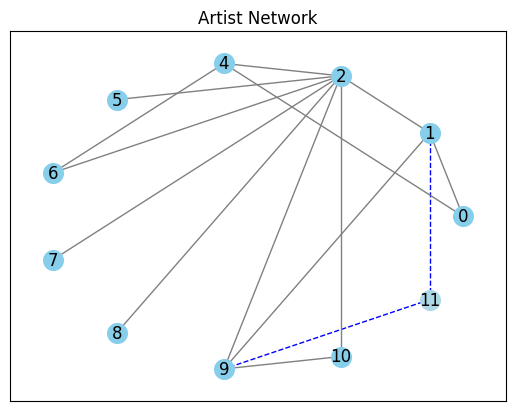

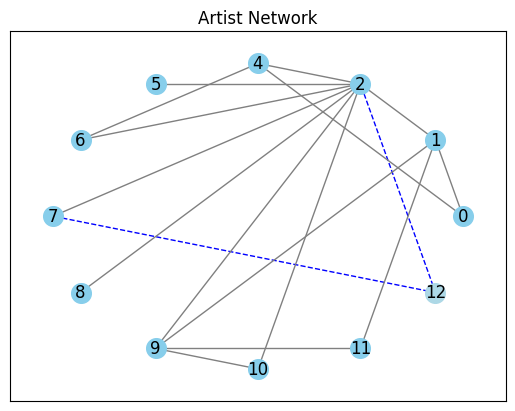

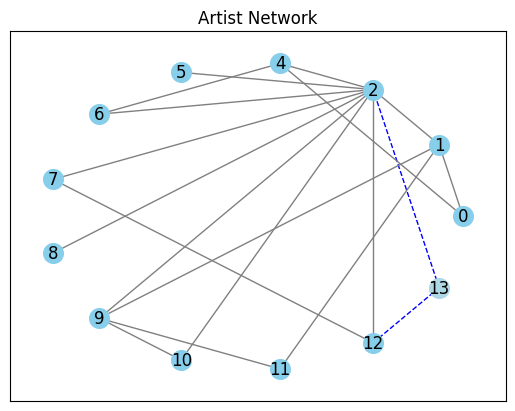

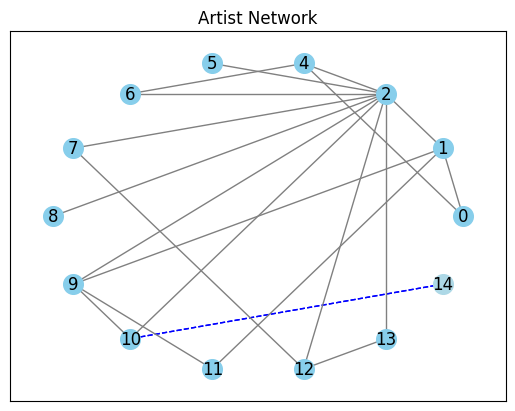

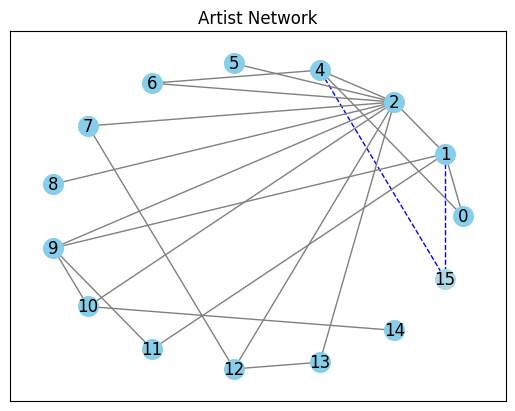

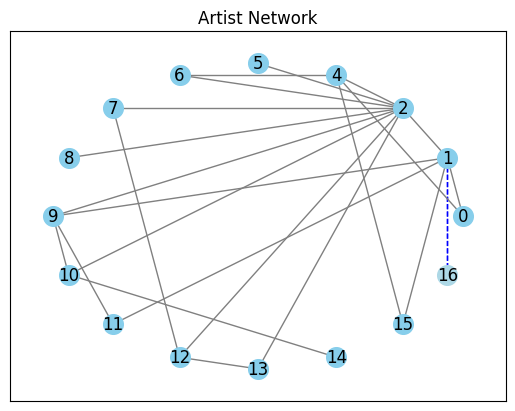

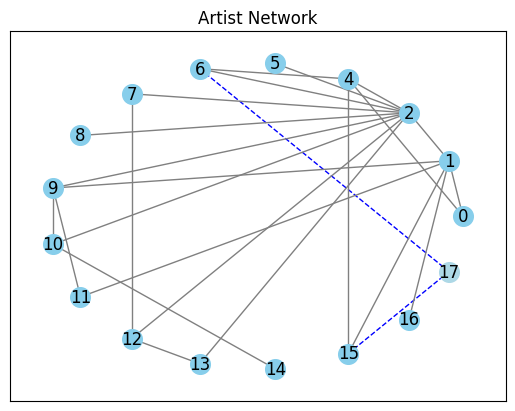

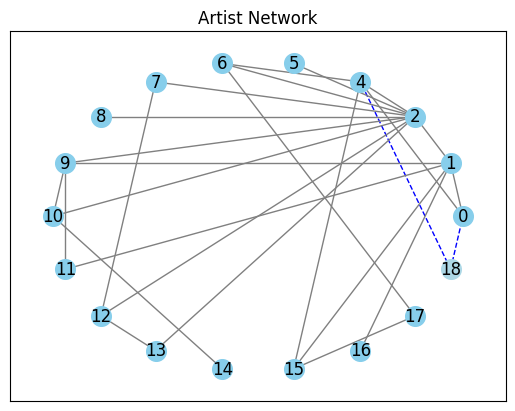

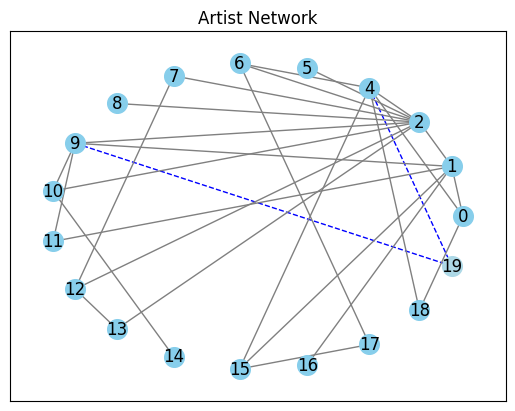

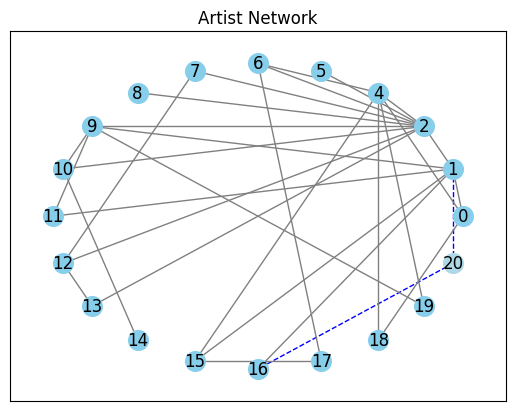

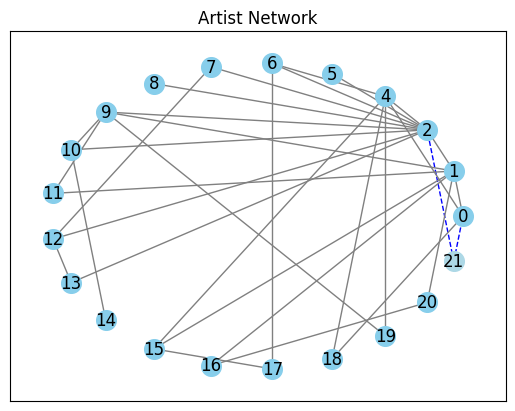

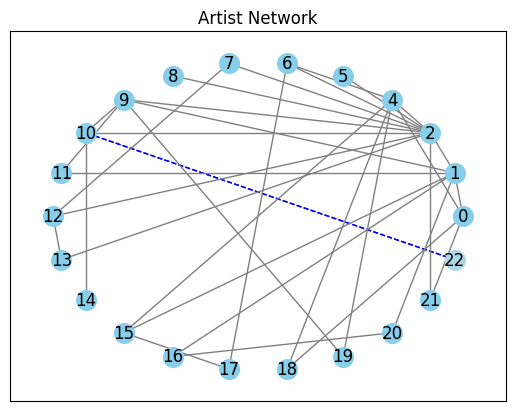

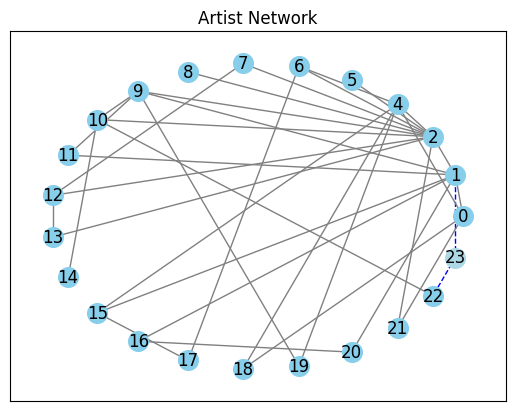

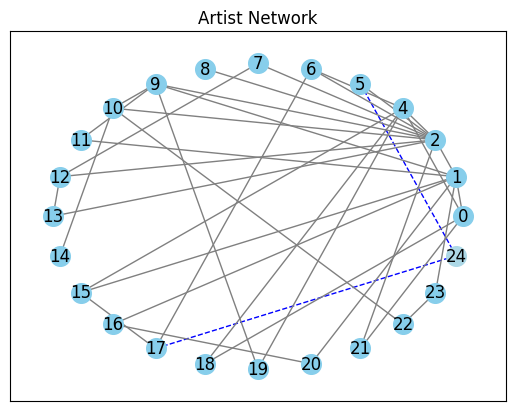

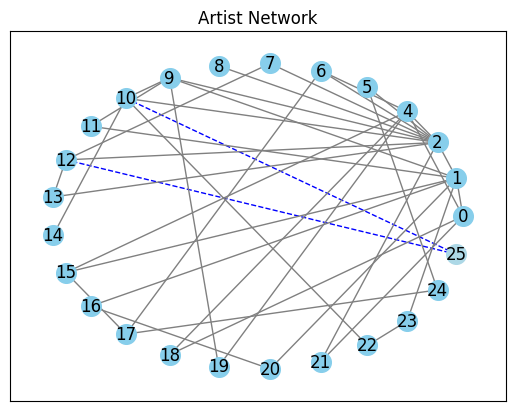

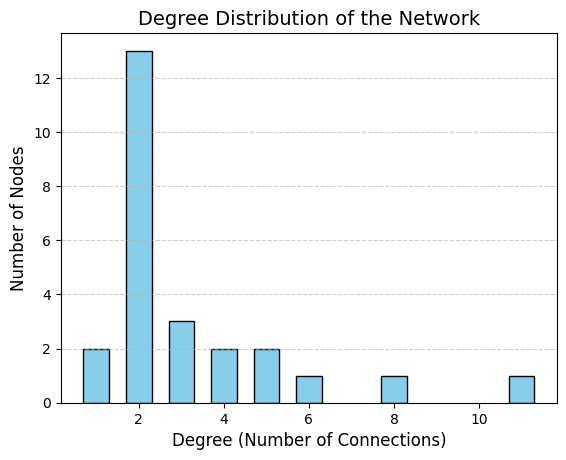

In [8]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def display_graph(graph, new_node=None, new_edges=None):
    pos = nx.circular_layout(graph)
    
    if new_node is None:
        new_node = []
        new_edges = []
    else:
        new_node = [new_node]
    
    existing_nodes = list(set(graph.nodes()) - set(new_node))
    existing_edges = list(set(graph.edges()) - set(new_edges) - set([(b, a) for (a, b) in new_edges]))
    
    nx.draw_networkx_nodes(graph, pos, nodelist=new_node, node_color='lightblue', node_size=200)
    nx.draw_networkx_nodes(graph, pos, nodelist=existing_nodes, node_color='skyblue', node_size=200)
    nx.draw_networkx_edges(graph, pos, edgelist=new_edges, style='dashed', edge_color='blue')
    nx.draw_networkx_edges(graph, pos, edgelist=existing_edges, edge_color='gray')
    nx.draw_networkx_labels(graph, pos)
    plt.title("Artist Network")
    plt.show()

def grow_graph_with_preferential_attachment(graph, total_nodes, initial_nodes):
    m = initial_nodes - 1

    for new_node in range(initial_nodes + 1, total_nodes + 1):
        graph.add_node(new_node)
        degrees = dict(graph.degree())
        total_degree = sum(degrees.values())
        probabilities = []
        for node, degree in degrees.items():
            probabilities.append(degree / total_degree)
        target_nodes = random.choices(list(degrees.keys()), weights=probabilities, k=m)
        new_edges = []
        for target in target_nodes:
            new_edges.append((new_node, target))
        graph.add_edges_from(new_edges)
        display_graph(graph, new_node=new_node, new_edges=new_edges)
    
    return graph

def plot_degree_distribution(graph):
    degrees = [degree for _, degree in graph.degree()]
    degree_counts = {}
    for degree in degrees:
        if degree not in degree_counts:
            degree_counts[degree] = 0
        degree_counts[degree] += 1
    sorted_degrees = sorted(degree_counts.keys())
    counts = [degree_counts[degree] for degree in sorted_degrees]
    plt.bar(sorted_degrees, counts, color='skyblue', edgecolor='black', width=0.6)
    plt.xlabel('Degree (Number of Connections)', fontsize=12)
    plt.ylabel('Number of Nodes', fontsize=12)
    plt.title('Degree Distribution of the Network', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

N = 25
initial_nodes = random.randint(2, N // 5)
initial_graph = nx.path_graph(initial_nodes)
display_graph(initial_graph)
final_graph = grow_graph_with_preferential_attachment(initial_graph, N, initial_nodes)
plot_degree_distribution(final_graph)
